### Exercice:

Scraping weather forecase from the The Weather Channel website `weather.com` using `requests` and `BeautifulSoup` libraries.

1. Implement a scraping script for getting 10 days weather forecasts of Benguerir city and Tanger City.
2. Store the data sets into Pandas DataFrame.
3. Use matplotlib library to plot the raining days of the two cities in the same figure.  


In [399]:
import requests
page_1 = requests.get("https://weather.com/weather/tenday/l/f37580e42d804f6d54467e56dd9f296e15fe9a25db53ddee63601416ecc06111")
page_2 = requests.get("https://weather.com/weather/tenday/l/701d5f2dd2a2b8cabcc505d69649a291257de6c1369a982396ea546ccb99198c")

In [400]:
from bs4 import BeautifulSoup
soup_1 = BeautifulSoup(page_1.content, 'html.parser')
soup_2 = BeautifulSoup(page_2.content, 'html.parser')

In [401]:
#Web scraping for Benguerrir city

#we loop for 10 so we get the data of 10 days

#we extract data by accessing trough class names and IDs and using get_text()
array_1=[]
for i in range(1,11) :
        array_1.append([soup_1.find_all(attrs={"data-testid" : "daypartName"})[i].get_text(),
        soup_1.find_all(attrs={"class" : "DetailsSummary--highTempValue--3PjlX","data-testid" : "TemperatureValue"})[i].get_text(),
        soup_1.find_all(attrs={"class" : "DetailsSummary--lowTempValue--2tesQ","data-testid" : "TemperatureValue"})[i].get_text(),
        soup_1.find_all(attrs={"class" : "DetailsSummary--extendedData--307Ax"})[2*i].get_text(),
        soup_1.find_all(attrs={"class" : "Wind--windWrapper--3Ly7c undefined","data-testid" : "Wind"})[i].get_text(),
        soup_1.find_all(attrs={"class" : "DailyContent--value--1Jers","data-testid" : "PercentageValue"})[i].get_text()])
print(array_1)
#each array has date high low overall wind and rain data 

[['Sat 17', '65°', '46°', 'Partly Cloudy', 'E 8 mph', '15%'], ['Sun 18', '71°', '46°', 'Partly Cloudy', 'ESE 7 mph', '15%'], ['Mon 19', '73°', '45°', 'Mostly Sunny', 'E 7 mph', '15%'], ['Tue 20', '73°', '45°', 'Partly Cloudy', 'SSW 8 mph', '8%'], ['Wed 21', '71°', '44°', 'Mostly Sunny', 'ENE 8 mph', '8%'], ['Thu 22', '70°', '43°', 'Sunny', 'ENE 8 mph', '7%'], ['Fri 23', '71°', '43°', 'Sunny', 'SSW 8 mph', '7%'], ['Sat 24', '70°', '44°', 'Mostly Sunny', 'S 8 mph', '7%'], ['Sun 25', '69°', '46°', 'Partly Cloudy', 'S 9 mph', '7%'], ['Mon 26', '67°', '47°', 'Partly Cloudy', 'SSW 13 mph', '10%']]


In [402]:
#Web scraping for Tangier city
array_2=[]
for i in range(1,11) :
        array_2.append([soup_2.find_all(attrs={"data-testid" : "daypartName"})[i].get_text(),
        soup_2.find_all(attrs={"class" : "DetailsSummary--highTempValue--3PjlX","data-testid" : "TemperatureValue"})[i].get_text(),
        soup_2.find_all(attrs={"class" : "DetailsSummary--lowTempValue--2tesQ","data-testid" : "TemperatureValue"})[i].get_text(),
        soup_2.find_all(attrs={"class" : "DetailsSummary--extendedData--307Ax"})[2*i].get_text(),
        soup_2.find_all(attrs={"class" : "Wind--windWrapper--3Ly7c undefined","data-testid" : "Wind"})[i].get_text(),
        soup_2.find_all(attrs={"class" : "DailyContent--value--1Jers","data-testid" : "PercentageValue"})[i].get_text()])

print(array_2)

[['Sat 17', '65°', '53°', 'Showers', 'SW 6 mph', '77%'], ['Sun 18', '68°', '58°', 'Partly Cloudy', 'E 14 mph', '14%'], ['Mon 19', '69°', '57°', 'Partly Cloudy', 'E 11 mph', '14%'], ['Tue 20', '70°', '59°', 'PM Showers', 'SE 8 mph', '12%'], ['Wed 21', '67°', '55°', 'AM Showers', 'SW 6 mph', '12%'], ['Thu 22', '66°', '54°', 'AM Fog/PM Sun', 'NNE 5 mph', '12%'], ['Fri 23', '66°', '54°', 'Sunny', 'S 5 mph', '40%'], ['Sat 24', '66°', '55°', 'Partly Cloudy', 'S 6 mph', '77%'], ['Sun 25', '67°', '56°', 'Partly Cloudy', 'SE 9 mph', '47%'], ['Mon 26', '65°', '57°', 'Showers', 'SE 13 mph', '15%']]


In [403]:
#storing Benguerrir city data into dataframes 
import pandas as pd
data_1 = pd.DataFrame(array_1, columns=["Date","High","Low","Overall","Wind","Rain"])
data_1

,Date,High,Low,Overall,Wind,Rain
0,Sat 17,65°,46°,Partly Cloudy,E 8 mph,15%
1,Sun 18,71°,46°,Partly Cloudy,ESE 7 mph,15%
2,Mon 19,73°,45°,Mostly Sunny,E 7 mph,15%
3,Tue 20,73°,45°,Partly Cloudy,SSW 8 mph,8%
4,Wed 21,71°,44°,Mostly Sunny,ENE 8 mph,8%
5,Thu 22,70°,43°,Sunny,ENE 8 mph,7%
6,Fri 23,71°,43°,Sunny,SSW 8 mph,7%
7,Sat 24,70°,44°,Mostly Sunny,S 8 mph,7%
8,Sun 25,69°,46°,Partly Cloudy,S 9 mph,7%
9,Mon 26,67°,47°,Partly Cloudy,SSW 13 mph,10%


In [404]:
#storing Tangier city data into dataframes 
import pandas as pd
data_2 = pd.DataFrame(array_2, columns=["Date","High","Low","Overall","Wind","Rain"])
data_2

,Date,High,Low,Overall,Wind,Rain
0,Sat 17,65°,53°,Showers,SW 6 mph,77%
1,Sun 18,68°,58°,Partly Cloudy,E 14 mph,14%
2,Mon 19,69°,57°,Partly Cloudy,E 11 mph,14%
3,Tue 20,70°,59°,PM Showers,SE 8 mph,12%
4,Wed 21,67°,55°,AM Showers,SW 6 mph,12%
5,Thu 22,66°,54°,AM Fog/PM Sun,NNE 5 mph,12%
6,Fri 23,66°,54°,Sunny,S 5 mph,40%
7,Sat 24,66°,55°,Partly Cloudy,S 6 mph,77%
8,Sun 25,67°,56°,Partly Cloudy,SE 9 mph,47%
9,Mon 26,65°,57°,Showers,SE 13 mph,15%


In [405]:
def convert(s):
    str1 = ""
    return(str1.join(s))
def toint(Rain):
    for i in range(10):
        Rain[i] = list(Rain[i])[0:-1]
        Rain[i] = convert(Rain[i])
        Rain[i] = int(Rain[i])
    return Rain

#we used these two functions to convert text values of the column Rain to int values so we can plot them later 


In [406]:
import matplotlib.pyplot as plt

Rain_1 = data_1["Rain"]
Rain_2 = data_2["Rain"]

R1 = toint(Rain_1)
R2 = toint(Rain_2)


In [407]:
R1

0    15
1    15
2    15
3     8
4     8
5     7
6     7
7     7
8     7
9    10
Name: Rain, dtype: object

In [408]:
R2

0    77
1    14
2    14
3    12
4    12
5    12
6    40
7    77
8    47
9    15
Name: Rain, dtype: object

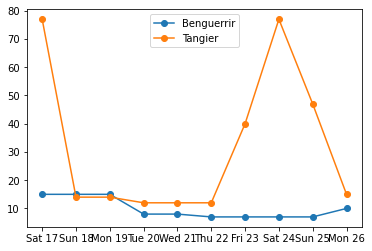

In [409]:
#ploting
plt.plot(data_1["Date"],R1,marker = 'o',label="Benguerrir")
plt.plot(data_1["Date"],R2,marker = 'o',label="Tangier")
plt.legend()
plt.show()